In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
from tensorflow.keras.layers import Dense 
from tensorflow.keras import Sequential, layers
from sklearn.metrics import classification_report
%matplotlib inline 
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Alphabets_data.csv')
data.head()

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10

In [3]:
data.describe()

xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.380823      2.488475   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       15.000000     15.000000     15.000000     15.000000     15.000000   

            x2ybar        xy2bar         xedge        xedgey         yedge  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.45400      7.929000      3.046100      8.338850      3.691750   
std        2.63107      2.080619      2.332541      1.546722      2.567073   
min        0.00000      0.000000      0.000000      0.000000      0.000000   
25%        5.00000      7.000000      1.000000      8.000000      2.000000   
50%        6.00000      8.000000      3.000000      8.000000      3.000000   
75%        8.00000      9.000000      4.000000      9.000000      5.000000   
max       15.00000     15.000000     15.000000     15.000000     15.000000   

            yedgex  
count  20000.00000  
mean       7.80120  
std        1.61747  
min        0.00000  
25%        7.00000  
50%        8.00000  
75%        9.00000  
max       15.00000

#### Data Exploration and Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [5]:
data.duplicated().sum()

1332

In [6]:
data.drop_duplicates(data,inplace=True)

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(18668, 17)

In [9]:
data.isna().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

<Axes: >

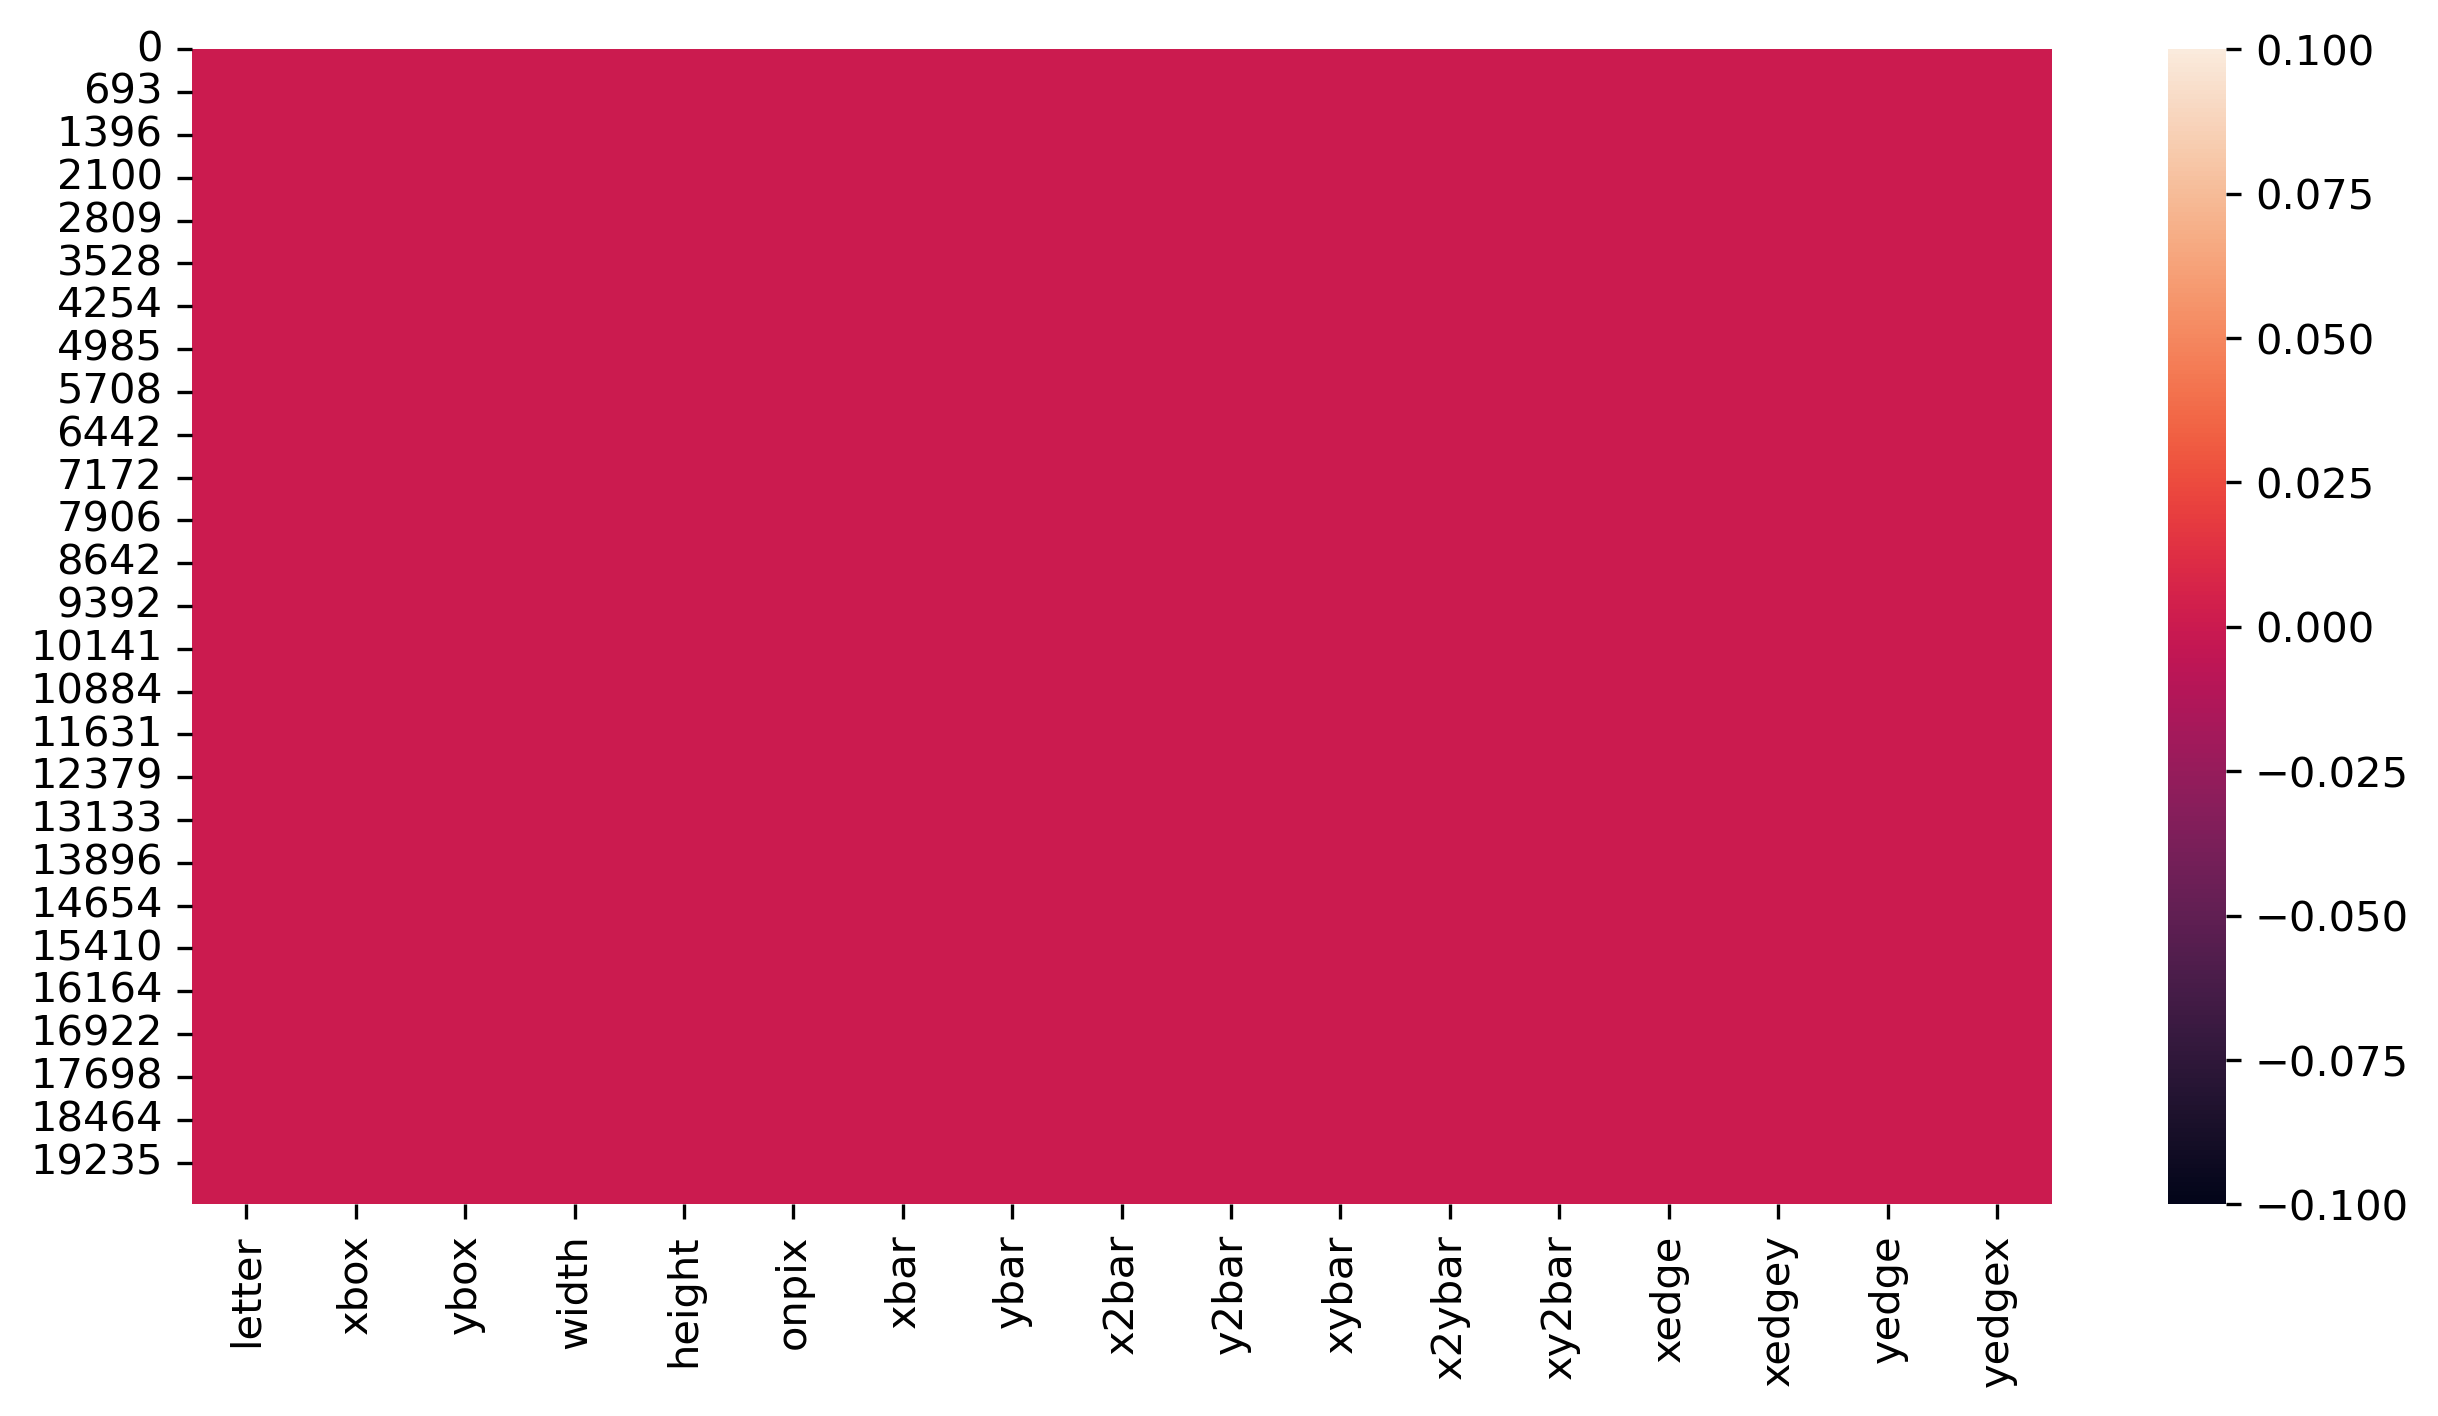

In [10]:
# there are no null values
sns.heatmap(data.isna())

<Axes: >

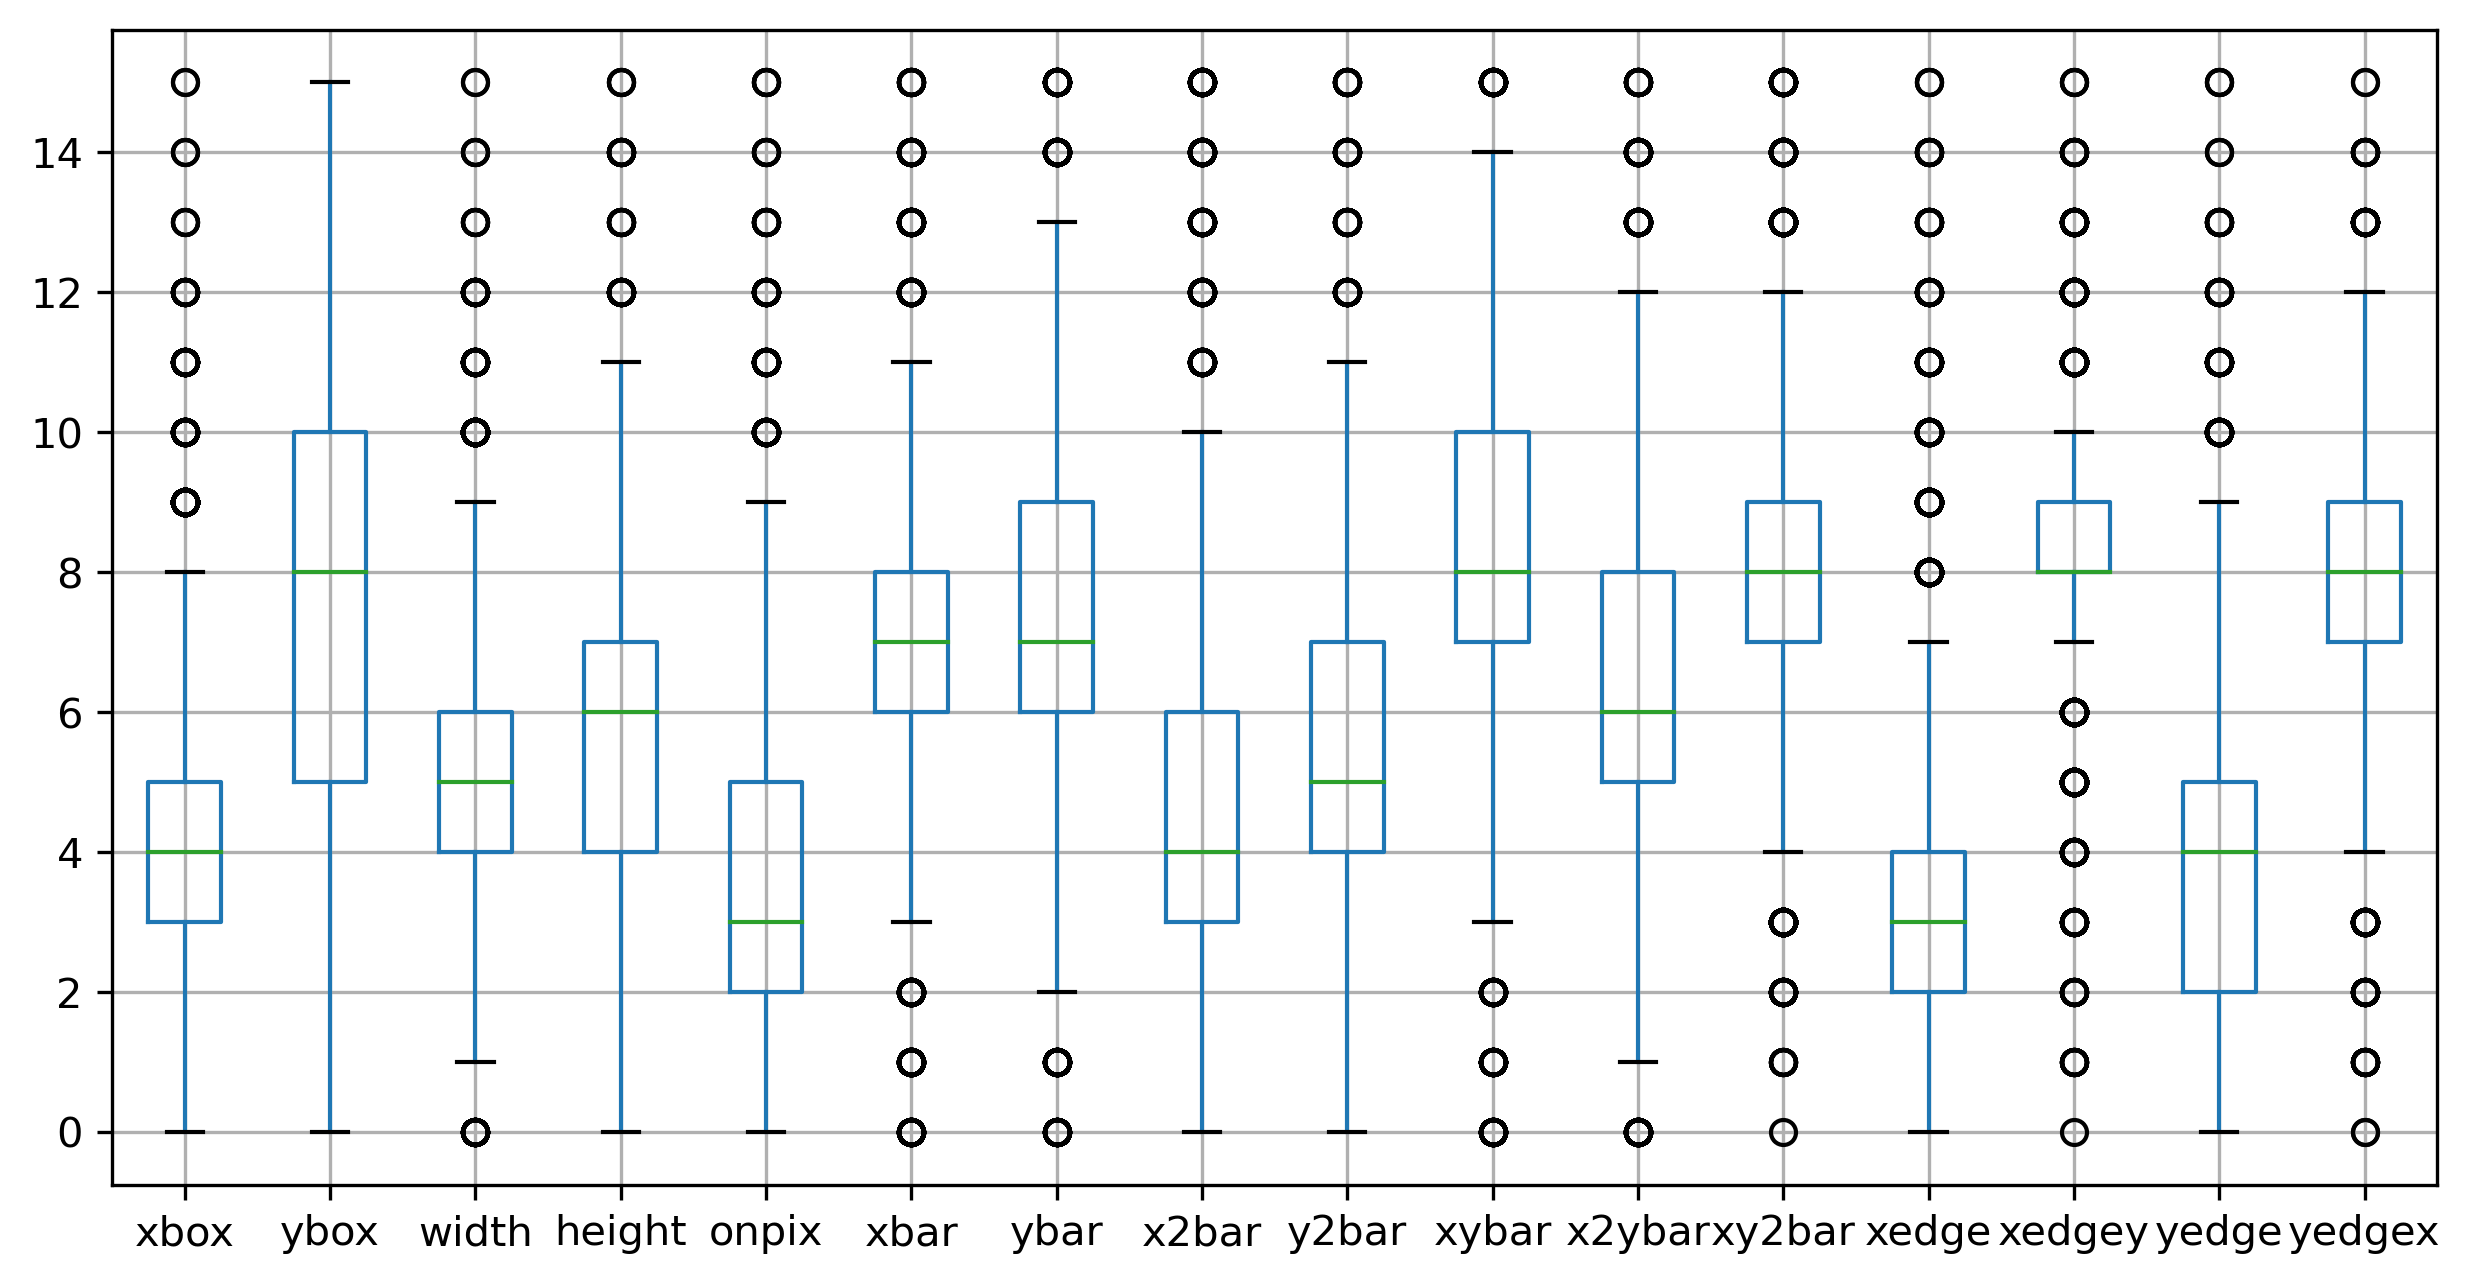

In [11]:
data.boxplot()

In [12]:
# almost in each column there are outliers present, we will detect and treat them 
def outlier_detection(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr= q3 - q1
    
    upper_extreme = q3 + (1.5 * iqr)
    lower_extreme = q1 - (1.5 * iqr)
    
    return lower_extreme,upper_extreme

In [13]:
def outlier_treatment(data,colname):
    lower_extreme,upper_extreme = outlier_detection(data,colname)
    data.loc[data[colname]>upper_extreme,colname] = upper_extreme
    data.loc[data[colname]<lower_extreme,colname] = lower_extreme
    
    print(f"All the outliers of column {colname} are treated !!")

In [14]:
data.columns

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')

In [15]:
outlier_treatment(data,'xbox')
outlier_treatment(data,'width')
outlier_treatment(data,'height')
outlier_treatment(data,'onpix')
outlier_treatment(data,'xbar')
outlier_treatment(data,'ybar')
outlier_treatment(data,'x2bar')
outlier_treatment(data,'y2bar')
outlier_treatment(data,'xybar')
outlier_treatment(data,'x2ybar')
outlier_treatment(data,'xy2bar')
outlier_treatment(data,'xedge')
outlier_treatment(data,'xedgey')
outlier_treatment(data,'yedge')
outlier_treatment(data,'yedgex')

All the outliers of column xbox are treated !!
All the outliers of column width are treated !!
All the outliers of column height are treated !!
All the outliers of column onpix are treated !!
All the outliers of column xbar are treated !!
All the outliers of column ybar are treated !!
All the outliers of column x2bar are treated !!
All the outliers of column y2bar are treated !!
All the outliers of column xybar are treated !!
All the outliers of column x2ybar are treated !!
All the outliers of column xy2bar are treated !!
All the outliers of column xedge are treated !!
All the outliers of column xedgey are treated !!
All the outliers of column yedge are treated !!
All the outliers of column yedgex are treated !!


<Axes: >

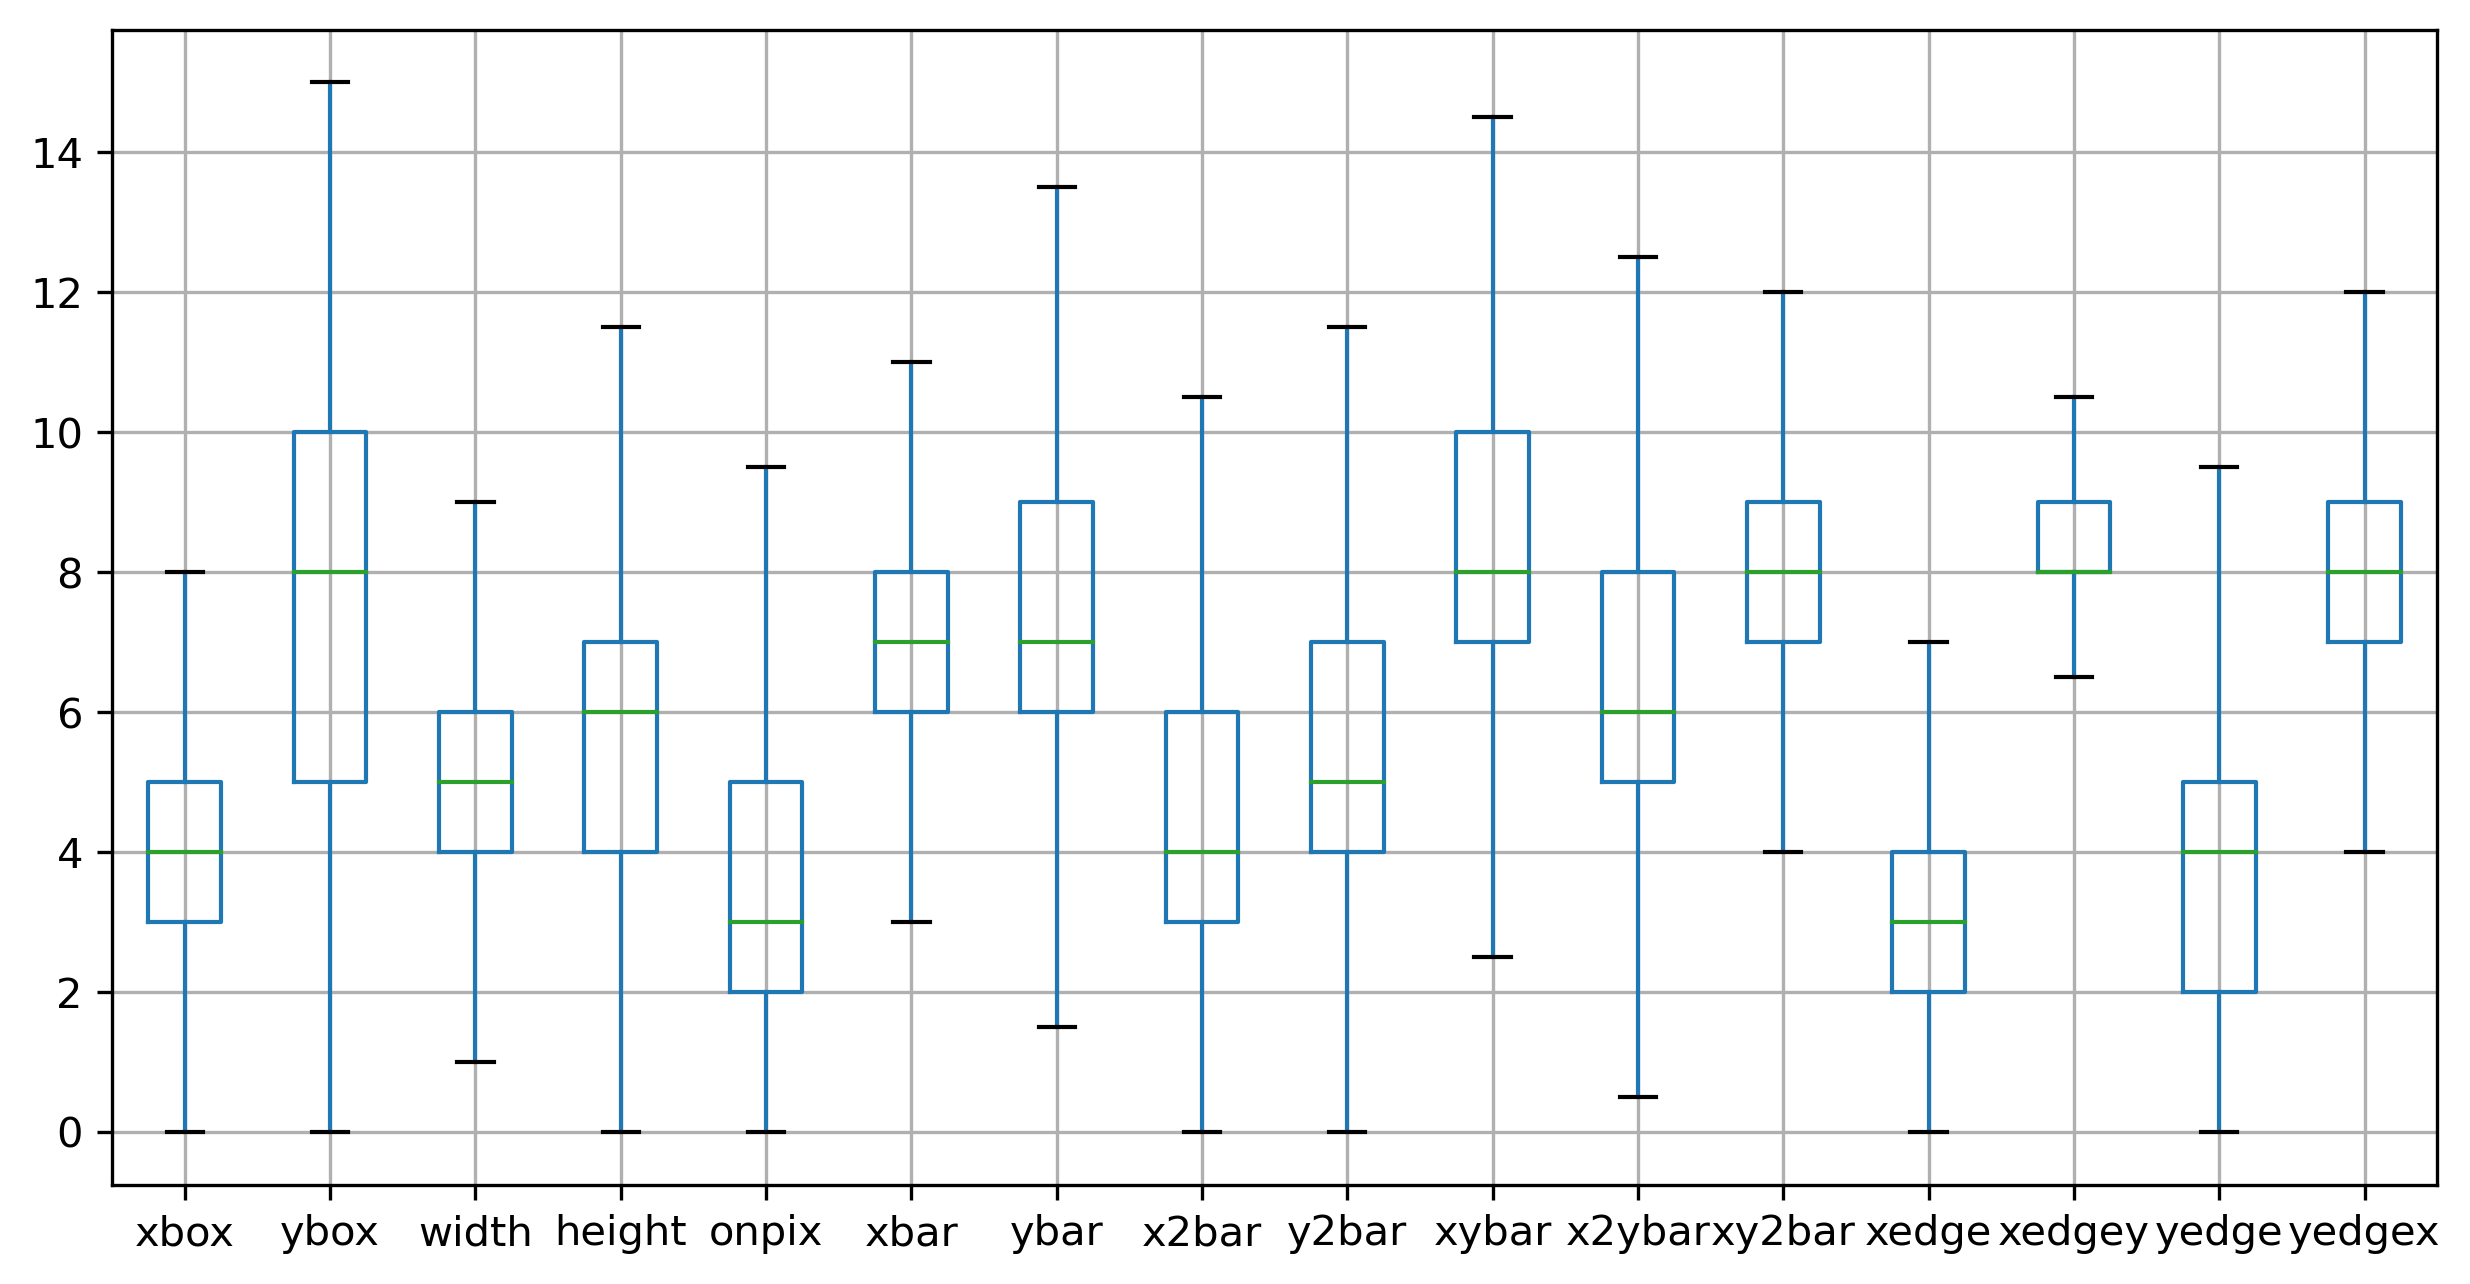

In [16]:
data.boxplot()

In [17]:
data.describe()

xbox          ybox         width        height         onpix  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       4.107832      7.244322      5.250750      5.502518      3.638740   
std        1.761202      3.187660      1.848601      2.164028      2.088274   
min        0.000000      0.000000      1.000000      0.000000      0.000000   
25%        3.000000      5.000000      4.000000      4.000000      2.000000   
50%        4.000000      8.000000      5.000000      6.000000      3.000000   
75%        5.000000     10.000000      6.000000      7.000000      5.000000   
max        8.000000     15.000000      9.000000     11.500000      9.500000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.936415      7.525311      4.504928      5.192040      8.369322   
std        1.848953      2.278087      2.383960      2.289683      2.409463   
min        3.000000      1.500000      0.000000      0.000000      2.500000   
25%        6.000000      6.000000      3.000000      4.000000      7.000000   
50%        7.000000      7.000000      4.000000      5.000000      8.000000   
75%        8.000000      9.000000      6.000000      7.000000     10.000000   
max       11.000000     13.500000     10.500000     11.500000     14.500000   

             x2ybar        xy2bar         xedge        xedgey         yedge  \
count  18668.000000  18668.000000  18668.000000  18668.000000  18668.000000   
mean       6.440433      7.897847      3.014892      8.372268      3.780373   
std        2.572298      1.929549      2.035784      1.232455      2.495821   
min        0.500000      4.000000      0.000000      6.500000      0.000000   
25%        5.000000      7.000000      2.000000      8.000000      2.000000   
50%        6.000000      8.000000      3.000000      8.000000      4.000000   
75%        8.000000      9.000000      4.000000      9.000000      5.000000   
max       12.500000     12.000000      7.000000     10.500000      9.500000   

             yedgex  
count  18668.000000  
mean       7.793390  
std        1.606092  
min        4.000000  
25%        7.000000  
50%        8.000000  
75%        9.000000  
max       12.000000

In [18]:
data.iloc[:,1:] = data.iloc[:,1:].astype(int)

In [19]:
data

letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  \
0          T     2     8      3     5.0    1.0     8  13.0    0.0    6.0   
1          I     5    12      3     7.0    2.0    10   5.0    5.0    4.0   
2          D     4    11      6     8.0    6.0    10   6.0    2.0    6.0   
3          N     7    11      6     6.0    3.0     5   9.0    4.0    6.0   
4          G     2     1      3     1.0    1.0     8   6.0    6.0    6.0   
...      ...   ...   ...    ...     ...    ...   ...   ...    ...    ...   
19994      T     5     8      7     7.0    7.0     7   9.0    4.0    8.0   
19995      D     2     2      3     3.0    2.0     7   7.0    7.0    6.0   
19996      C     7    10      8     8.0    4.0     4   8.0    6.0    9.0   
19997      T     6     9      6     7.0    5.0     6  11.0    3.0    7.0   
19999      A     4     9      6     6.0    2.0     9   5.0    3.0    1.0   

       xybar  x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0        6.0    10.0       8      0     8.0    0.0       8  
1       13.0     3.0       9      2     8.0    4.0      10  
2       10.0     3.0       7      3     7.0    3.0       9  
3        4.0     4.0      10      6    10.0    2.0       8  
4        6.0     5.0       9      1     7.0    5.0      10  
...      ...     ...     ...    ...     ...    ...     ...  
19994    7.0     7.0       8      3    10.0    8.0       6  
19995    6.0     6.0       4      2     8.0    3.0       7  
19996   12.0     9.0      12      2     9.0    3.0       7  
19997   11.0     9.0       5      2    10.0    2.0       4  
19999    8.0     1.0       8      2     7.0    2.0       8  

[18668 rows x 17 columns]

In [20]:
# our target column is letter
# performing labelencoding on column letter 
from sklearn.preprocessing import LabelEncoder 
LE = LabelEncoder()
data['letter'] = LE.fit_transform(data['letter'])

In [21]:
x = data.drop('letter',axis=1)
y = data['letter']

In [23]:
x

xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0         2     8      3     5.0    1.0     8  13.0    0.0    6.0    6.0   
1         5    12      3     7.0    2.0    10   5.0    5.0    4.0   13.0   
2         4    11      6     8.0    6.0    10   6.0    2.0    6.0   10.0   
3         7    11      6     6.0    3.0     5   9.0    4.0    6.0    4.0   
4         2     1      3     1.0    1.0     8   6.0    6.0    6.0    6.0   
...     ...   ...    ...     ...    ...   ...   ...    ...    ...    ...   
19994     5     8      7     7.0    7.0     7   9.0    4.0    8.0    7.0   
19995     2     2      3     3.0    2.0     7   7.0    7.0    6.0    6.0   
19996     7    10      8     8.0    4.0     4   8.0    6.0    9.0   12.0   
19997     6     9      6     7.0    5.0     6  11.0    3.0    7.0   11.0   
19999     4     9      6     6.0    2.0     9   5.0    3.0    1.0    8.0   

       x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0        10.0       8      0     8.0    0.0       8  
1         3.0       9      2     8.0    4.0      10  
2         3.0       7      3     7.0    3.0       9  
3         4.0      10      6    10.0    2.0       8  
4         5.0       9      1     7.0    5.0      10  
...       ...     ...    ...     ...    ...     ...  
19994     7.0       8      3    10.0    8.0       6  
19995     6.0       4      2     8.0    3.0       7  
19996     9.0      12      2     9.0    3.0       7  
19997     9.0       5      2    10.0    2.0       4  
19999     1.0       8      2     7.0    2.0       8  

[18668 rows x 16 columns]

In [24]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [94]:
# Building a basic ANN model
default_model = Sequential()
default_model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))  # Input layer + Hidden layer
default_model.add(Dense(32, activation='relu'))  # Another hidden layer
default_model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Output layer

In [95]:
default_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [96]:
history = default_model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32)

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2510 - loss: 2.6658 - val_accuracy: 0.6491 - val_loss: 1.2322
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6874 - loss: 1.0942 - val_accuracy: 0.7241 - val_loss: 0.9170
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7582 - loss: 0.8132 - val_accuracy: 0.7730 - val_loss: 0.7774
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7962 - loss: 0.6839 - val_accuracy: 0.8028 - val_loss: 0.6835
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8221 - loss: 0.5976 - val_accuracy: 0.8108 - val_loss: 0.6286
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8436 - loss: 0.5293 - val_accuracy: 0.8219 - val_loss: 0.5708
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8572 - loss: 0.4831 - val_accuracy: 0.8339 - val_loss: 0.5311
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8704 - loss: 0.4375 - val_accuracy: 0.

In [97]:
# Evaluate the model on the test set
test_loss, test_acc = default_model.evaluate(x_test_scaled, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9182 - loss: 0.2556
Test Accuracy: 0.9210


### Hyper-Parameter Tuning

In [57]:
# Defining a function that returns a compiled model
def create_model(activation='relu', optimizer='adam', neurons=32):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # assuming classification
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [112]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Creating a custom Keras wrapper
# CustomKerasClassifier is created to enable hyperparameter tuning with Scikit-learn's GridSearchCV for a Keras model.
class CustomKerasClassifier(KerasClassifier, BaseEstimator, ClassifierMixin):
    def __init__(self, activation='relu', optimizer='adam', neurons=32, batch_size=32, epochs=50):
        self.activation = activation
        self.optimizer = optimizer
        self.neurons = neurons
        self.batch_size = batch_size
        self.epochs = epochs
        super().__init__(build_fn=self.create_model)

    def create_model(self):
        model = Sequential()
        model.add(Dense(self.neurons, input_dim=x_train_scaled.shape[1], activation=self.activation))
        model.add(Dense(self.neurons, activation=self.activation))
        model.add(Dense(len(np.unique(y_train)), activation='softmax'))
        model.compile(optimizer=self.optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def predict(self, X):
        y_pred_probs = self.model.predict(X)
        return np.argmax(y_pred_probs, axis=1)  # Return class labels

In [113]:
# Wrapping Keras model into a Scikit-learn classifier
model = CustomKerasClassifier()

In [114]:
# Defining hyperparameter grid
param_grid = {
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam', 'rmsprop'],  
    'neurons': [32, 64],               
    'batch_size': [16, 32],            
    'epochs': [50, 100]                
}

In [115]:
# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(x_train_scaled, y_train)

467/467 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4306 - loss: 2.1654


In [116]:
print(f"Best Params: {grid_result.best_params_}")
print(f"Best Accuracy: {grid_result.best_score_:.4f}")

Best Params: {'activation': 'tanh', 'batch_size': 32, 'epochs': 50, 'neurons': 64, 'optimizer': 'adam'}
Best Accuracy: 0.6847


### Evaluation 

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
# Evaluating Default model
y_pred_probs = default_model.predict(x_test_scaled)  
y_pred = np.argmax(y_pred_probs, axis=1)  
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.9210
Precision: 0.9231
Recall: 0.9210
F1-Score: 0.9212

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       144
           1       0.88      0.94      0.91       156
           2       0.89      0.91      0.90       147
           3       0.89      0.94      0.91       163
           4       0.86      0.92      0.89       144
           5       0.90      0.93      0.92       146
           6       0.93      0.84      0.88       173
           7       0.85      0.89      0.87       133
           8       0.94      0.94      0.94       108
           9       0.95      0.91      0.93       150
          10       0.96      0.94      0.95       149
          11       0.98      0.95      0.96       147
          12       0.86      0.97      0.91       143
          13       0.94      0.87      0.90       138
          14       0.92      0.91      0.91       131
   

In [126]:
best_model = grid_result.best_estimator_

In [131]:
# Evaluating Best model 
y_pred = best_model.predict(x_test_scaled)  
print(f"Shape of predictions: {y_pred.shape}")  
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted'):.4f}")
print(classification_report(y_test, y_pred))

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Shape of predictions: (3734,)
Accuracy: 0.7126
Precision: 0.7220
Recall: 0.7126
F1 Score: 0.7076
              precision    recall  f1-score   support

           0       0.83      0.86      0.85       144
           1       0.56      0.83      0.67       156
           2       0.80      0.71      0.75       147
           3       0.72      0.79      0.75       163
           4       0.82      0.72      0.77       144
           5       0.73      0.61      0.66       146
           6       0.57      0.50      0.53       173
           7       0.56      0.26      0.36       133
           8       0.95      0.77      0.85       108
           9       0.84      0.85      0.85       150
          10       0.63      0.81      0.71       149
          11       0.85      0.82      0.83       147
          12       0.64      0.85      0.73       143
          13       0.80      0.71      0.75       138
          14       0.60      0.69      0.64       1

In [ ]:
'''
The default hyperparameter model usually has lower accuracy and may underperform across metrics. In contrast, 
the tuned model shows improved accuracy and responsiveness, indicating better generalization. Overall, hyperparameter 
tuning significantly enhances model performance and prediction accuracy.
'''